In [1]:
!pip install -Uqq fastbook
!pip install fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

/opt/conda/lib/python3.7/site-packages/fastbook/__init__.py:22: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


## Lets trying deep learning for the first time!

In [2]:
key = os.environ.get('AZURE_SEARCH_KEY','xx')
results = search_images_bing(key,'formula_one')
ims = results.attrgot('content_url')
len(ims)

150

In [3]:
ims[0]

'https://i.kinja-img.com/gawker-media/image/upload/s--wkLS6XE4--/c_fill,fl_progressive,g_center,h_900,q_80,w_1600/ipuk1xjl7cbzp294pko2.jpg'

In [4]:
car_types = 'formula_one','le_mans'
path = Path('cars')

In [5]:
# creates a new folder in the directory, then creates subfolder and downloads images to it
if not path.exists():
    path.mkdir()
    for c in car_types:
        dest = (path/c)
        results = search_images_bing(key,c)
        download_images(dest, urls=results.attrgot('content_url'))

In [6]:
#checking to see if there are images downloaded to our files
fns = get_image_files(path)
fns

(#279) [Path('cars/formula_one/00000123.jpg'),Path('cars/formula_one/00000055.jpg'),Path('cars/formula_one/00000036.jpg'),Path('cars/formula_one/00000008.jpg'),Path('cars/formula_one/00000075.jpg'),Path('cars/formula_one/00000013.jpg'),Path('cars/formula_one/00000028.png'),Path('cars/formula_one/00000128.jpg'),Path('cars/formula_one/00000067.jpg'),Path('cars/formula_one/00000144.jpg')...]

In [7]:
#apparently these are the failed images
failed = verify_images(fns)
failed

(#0) []

In [8]:
# will have to unlink the failed ones
failed.map(Path.unlink);

In [9]:
#??DataBlock
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [10]:
path

Path('cars')

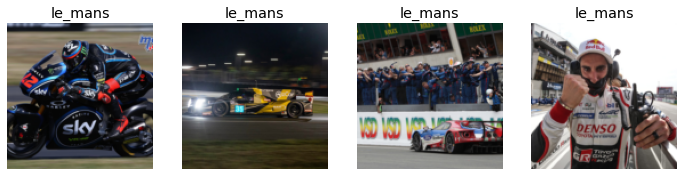

In [11]:
dls = cars.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

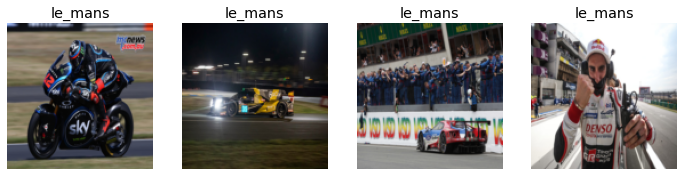

In [12]:
# different ways to resize the image as the default for `Resize` is to crop the images to fit
cars = cars.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = cars.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

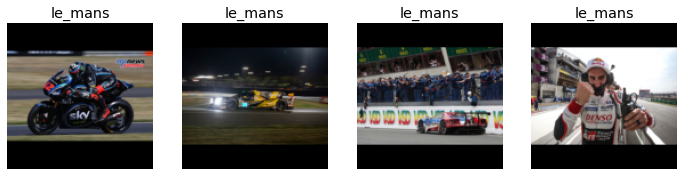

In [13]:
cars = cars.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = cars.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

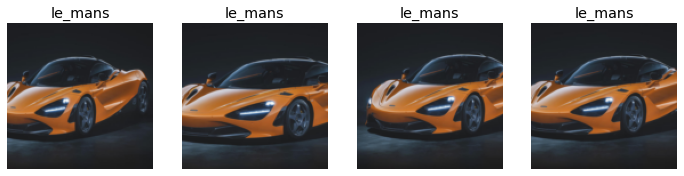

In [14]:
#zooming in on different parts
cars = cars.new(item_tfms=RandomResizedCrop(128, min_scale=0.5))
dls = cars.dataloaders(path)
dls.train.show_batch(max_n=4,nrows=1,unique=True)

## Data Augmentation

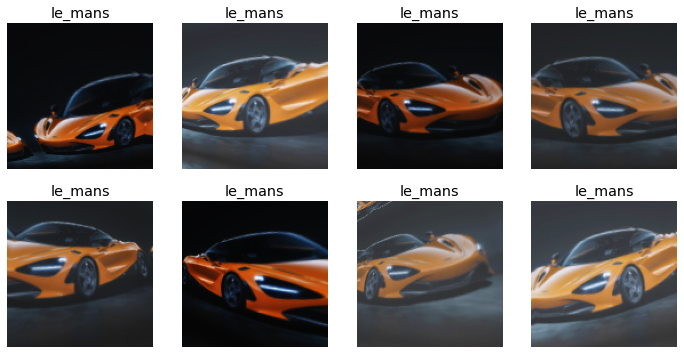

In [15]:
# augmenting the photo for training, distort and all that
cars = cars.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = cars.dataloaders(path)
dls.train.show_batch(max_n=8,nrows=2,unique=True)

# train your model

In [16]:
cars = cars.new(
item_tfms=RandomResizedCrop(224, min_scale=0.5),
batch_tfms=aug_transforms()
)

dls = cars.dataloaders(path)

In [17]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.246579,0.843374,0.381818,00:22


epoch,train_loss,valid_loss,error_rate,time
0,1.018837,0.761400,0.345455,00:28
1,0.739991,0.613162,0.254545,00:28
2,0.611965,0.636807,0.236364,00:28
3,0.548474,0.635974,0.254545,00:28


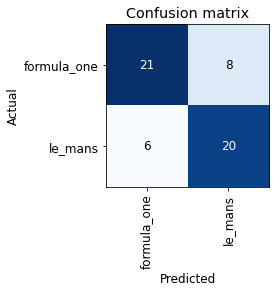

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

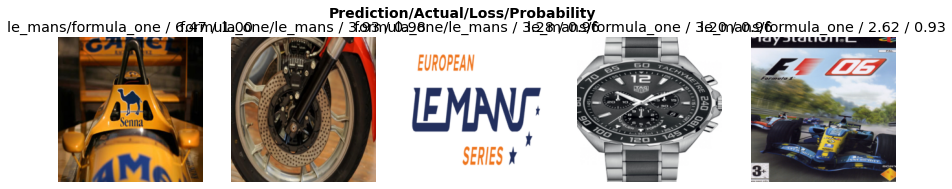

In [19]:
interp.plot_top_losses(5, nrows=1)

In [20]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [21]:
for idx in cleaner.delete(): 
    # unlink means deleting files
    cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): 
    #if we renamed it, then itll move them to the correct directory
    shutil.move(str(cleaner.fns[idx]), path/cat)

In [22]:
cars = cars.new(
item_tfms=RandomResizedCrop(224, min_scale=0.5),
batch_tfms=aug_transforms()
)

dls = cars.dataloaders(path)
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.151188,2.953925,0.509091,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.926398,1.632946,0.454545,00:28
1,0.723684,0.794506,0.400000,00:28
2,0.579167,0.584286,0.254545,00:28
3,0.508676,0.461965,0.200000,00:29


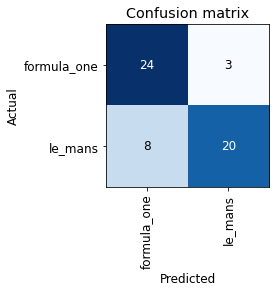

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

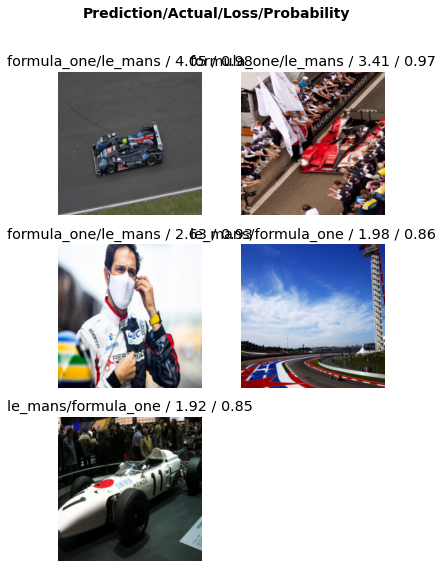

In [25]:
interp.plot_top_losses(5, nrows=3)

In [ ]:
learn.export()

In [2]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [3]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.predict('images/fernandoalonso.jpg')

('formula_one', tensor(0), tensor([9.9987e-01, 1.2605e-04]))

In [5]:
learn_inf.dls.vocab

(#2) ['formula_one','le_mans']

In [ ]:
# the upload button and read image doesnt work very well hence it has create havoc, switching to google colab

In [6]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [4]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

NameError: name 'pred' is not defined

In [80]:
btn_upload = widgets.FileUpload()

In [7]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [5]:
btn_upload = widgets.FileUpload()

In [9]:
with out_pl: 
    display(img.to_thumb(128,128))
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

NameError: name 'out_pl' is not defined